# BSDS Class Time Preferences

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../data/data.csv")
df.columns

Index(['Class', 'Blocks Or Stand Alone', 'Any comments or concerns?',
       'Block: Tuesday/Thursday morning block (9:30 AM-12:15 PM)',
       'Block: Monday/Wednesday morning block (9:30 AM-12:15 PM)',
       'Block: Monday/Wednesday afternoon block (2:00-4:45PM)',
       'Block: Tuesday/Thursday afternoon block (2:00-4:45PM)',
       'Stand Alone: Monday/Wednesday/Friday morning',
       'Stand Alone: Monday/Wednesday morning',
       'Stand Alone: Tuesday/Thursday morning',
       'Stand Alone: Monday/Wednesday afternoon',
       'Stand Alone: Tuesday/Thursday afternoon',
       'Stand Alone: Monday/Wednesday/Friday afternoon'],
      dtype='object')

## How many students filled out the form

In [13]:
second_year_count = (df["Class"] == "Class of 2028").sum()
third_year_count = (df["Class"] == "Class of 2027").sum()

In [14]:
print(f"{second_year_count} second years filled out the form. ")
print(f"{third_year_count} third years filled out the form. ")

13 second years filled out the form. 
15 third years filled out the form. 


## Stand alone Classes vs. Block Classes?

In [15]:
alone = (df["Blocks Or Stand Alone"] == "Stand alone Classes").sum()
block = (df["Blocks Or Stand Alone"] == "Blocks of Classes").sum()
type = pd.DataFrame({"Type": ["Alone", "Block"], 
                     "Count": [alone, block]})

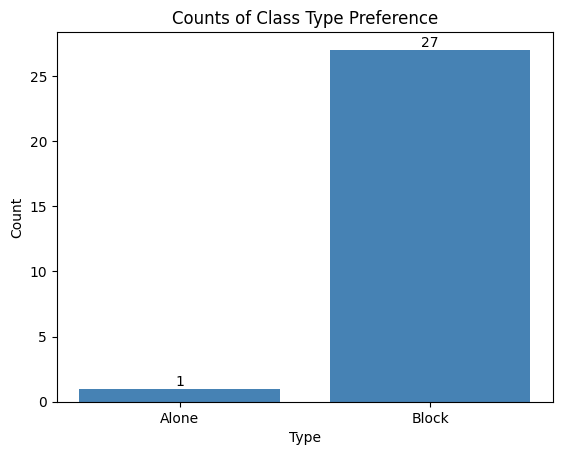

In [16]:
plt.bar(type["Type"], type["Count"], color = "steelblue")
for i, v in enumerate(type["Count"]):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Counts of Class Type Preference")
plt.xlabel("Type")
plt.ylabel("Count")

plt.savefig("../images/counts.png")
plt.show()

## Class Time Preferences?

In [17]:
block_cols = [c for c in df.columns if c.startswith("Block:")]
top_choice_counts = (df[block_cols] == 1).sum()
top_5 = top_choice_counts.sort_values(ascending=False).head(5)

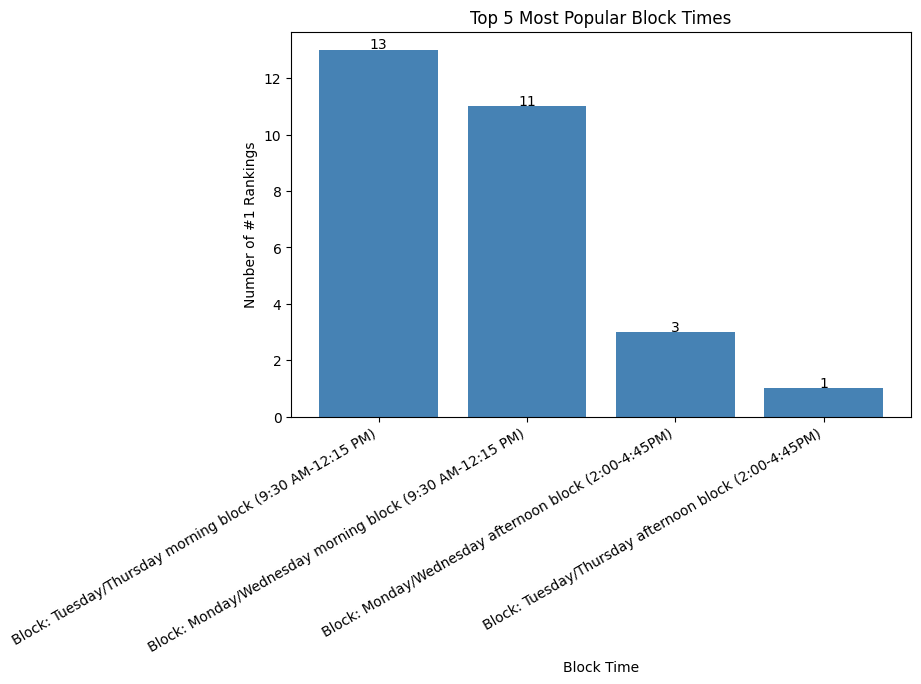

In [18]:
plt.figure(figsize=(8,5))
bars = plt.bar(top_5.index, top_5.values, color="steelblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height - 0.065,                       
        str(int(height)),
        ha='center', va='bottom'
    )

plt.xlabel("Block Time")
plt.ylabel("Number of #1 Rankings")
plt.title("Top 5 Most Popular Block Times")
plt.xticks(rotation=30, ha="right")

plt.savefig("../images/block.png")
plt.show()

In [19]:
block_cols = [c for c in df.columns if c.startswith("Stand")]
top_choice_counts = (df[block_cols] == 1).sum()
top_5 = top_choice_counts.sort_values(ascending=False).head(5)

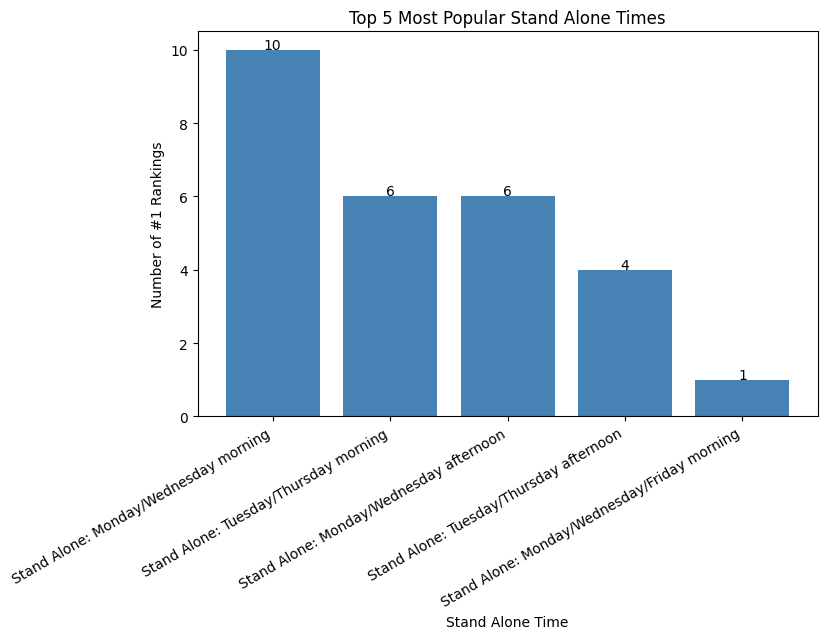

In [20]:
plt.figure(figsize=(8,5))
bars = plt.bar(top_5.index, top_5.values, color="steelblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height - 0.055,                       
        str(int(height)),
        ha='center', va='bottom'
    )

plt.xlabel("Stand Alone Time")
plt.ylabel("Number of #1 Rankings")
plt.title("Top 5 Most Popular Stand Alone Times")
plt.xticks(rotation=30, ha="right")

plt.savefig("../images/stand.png")
plt.show()